# 신경망 (Neural Network)

인간의 뇌의 뉴런을 본따서 머신러닝에 도입을 했고, 이것을 퍼셉트론(perceptron)이라 부르고, 이 퍼셉트론을 연결한 것을 인공신경망이라고 부른다.

![image](https://user-images.githubusercontent.com/63278762/126730108-f33210f8-8d85-4486-84ff-899804ddeaf1.png)

위의 그림에서 처음에 들어가는 층을 입력층(input layer), 마지막 층을 출력층(output layer)라고 부른다.    
중간에 있는 층은 은닉층(hidden layer)로 은닉층이 없으면 단층 퍼셉트론, 한개 이상 있으면 다층 퍼셉트론이라고 한다.

## Bias가 있는 이유

Bias(편향) 뉴런이 얼마나 쉽게 활성화되는지를 결정    
https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks

# 활성화 함수

활성화 함수는 보통 비선형 함수를 사용한다.

### 1. Sigmoid

$$\frac{1}{1+e^{-x}}$$

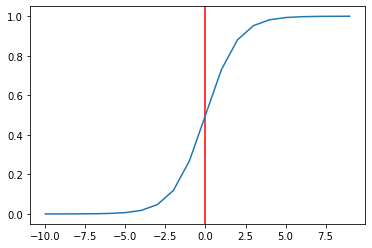

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

z1 = sigmoid(np.arange(-10,10))

plt.axvline(x=0, color='r')
plt.plot(np.arange(-10, 10), z1)

##### 단점
1. vanishing gradient 현상이 발생한다.
2. exp 함수 사용 시 비용이 크다.

[vanishing gradient란?](https://brunch.co.kr/@chris-song/39)

### 2. Tanh

$$\frac{e^x-e^{-x}}{e^x+e^{-x}}$$

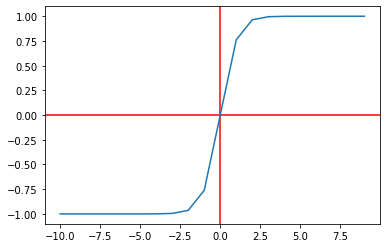

In [18]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

z1 = tanh(np.arange(-10,10))

plt.axvline(x=0, color='r')
plt.axhline(y=0, color='r')
plt.plot(np.arange(-10, 10), z1)

* sigmoid의 중심 축을 0,0으로 옮겨 최적화 과정이 느려지는 것을 해결
* vanishing gradient 문제 존재

### 3. ReLU

$$max(0,x)$$

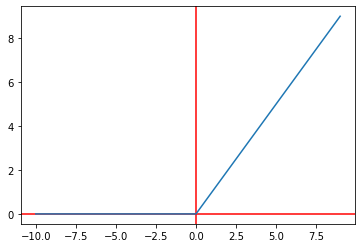

In [26]:
def relu(x):
    if x>0:
        return x
    else:
        return 0
    
z1 = [relu(x) for x in np.arange(-10,10)]

plt.axvline(x=0, color='r')
plt.axhline(y=0, color='r')
plt.plot(np.arange(-10, 10), z1)

* 학습이 빠름
* 연산 비용이 크지 않고, 구현이 매우 간단하다.    
(cs231n에서 이미지 분류할 때 사용했던 알고리즘)

[활성화함수의 종류](https://reniew.github.io/12/)

# Loss 함수

우리가 원하는 정보 사이의 차이를 줄이기 위해 파라미터를 조정하는 것이 딥러닝의 핵심이다.    
이 차이를 구하는데 사용하는 함수가 **Loss함수=Cost함수**

Loss함수는 gradient를 계산하는데 사용하고, gradient는 Neural Net의 가중치를 계산하기 위해서 사용된다.    

[Loss 함수에 대해서](https://towardsdatascience.com/understanding-different-loss-functions-for-neural-networks-dd1ed0274718)

### 1. 평균 제곱 오차
MSE : Mean Square Error
$$\frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2$$

### 2. Cross Entropy
두 확률분포 사이의 유사도가 클수록 작아지는 값.
$$-\sum_{i=1}^{n}t_ilogy_i$$

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


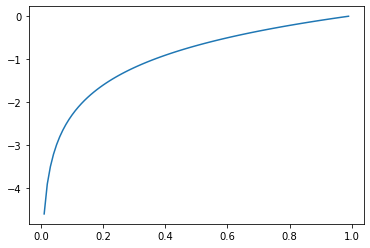

In [28]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.arange(0, 1, 0.01)
y = np.log(x)
 
plt.plot(x, y)
plt.show()

* x축이 정답일 확률
* y축이 loss값*-1
    - loss값에 -1을 곱하는 이유는 정답확률이 낮아질 때 무한히 값이 커지도록 하기 위해서
    - 정답일 확률이 높을 수록 loss가 0이 된다.

# 경사하강법

Loss 값을 줄이는게 우리의 목표!!

각 단계(step)마다 기울기를 계산해 기울기가 가리키는 방향으로 이동하는 것.
* step = learning rate
    - 이때 step은 너무 커도 안되고 너무 작아도 안된다. (너무 크면 반대편으로 껑충 뛸 수도 있고, 너무 작으면 성능이 너무 느리다.)
    - step이 너무 클 때 그래프를 벗어날 수도 있는데 이 문제를 overshooting이라고 한다.
    - step이 너무 작을 경우 엄청나게 많은 시간이 소요된다.
* 초기 가중치는 랜덤하게 지정해야 하는데 어느 위치로 지정해야 할까??
    - https://reniew.github.io/13/

# 오차역전파법 (Backpropagation)

![image](https://user-images.githubusercontent.com/63278762/126751643-cc906078-e394-402d-919c-12a0124b0976.png)